# Семинар 9. Визуализация данных в python

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

## Вредные советы

1. **Заголовок** графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не **подписывай** ни одной **оси** у графика. Пусть смотрящий развивает свою интуицую!
3. **Единицы измерения** совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше **шрифт** на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

Если серьезно, то обязательно посмотрите список рекомендованных материалов в конце ноутбука по правилам оформления графиков и работе с библиотеками для визуализации данных в Python.  

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`. Сегодня познакомимся с первыми двумя

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

## Данные для семинара. Продажи и оценки видеоигр

Работаем с датасетом по продажам и оценкам видео-игр. Датасет взят с [Кеггла](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

__Описание колонок:__
* `Name` $-$ название видеоигры
* `Platform` $-$ платформа, на которой игра была запущена
* `Year_of_Release` $-$ год релиза
* `Genre` $-$ жанр
* `Publisher` $-$ издатель
* `NA_Sales` $-$ объем продаж в Северной Америке (в млн штук)
* `EU_Sales` $-$ объем продаж в Евросоюзе (в млн штук)
* `JP_Sales` $-$ объем продаж в Японии (в млн штук)
* `Other_Sales` $-$ объем продаж в остальном мире (в млн штук)
* `Global_Sales` $-$ общий объем продаж (в млн штук)
* `Critic_Score` $-$ совокупный балл, составленный сотрудниками Metacritic
* `Critic_Count` $-$ кол-во критиков, оцениваемых игру
* `User_Score` $-$ совокупный балл, составленный подписчиками Metacritic (пользователями)
* `User_Count` $-$ кол-во пользователей, оцениваемых игру
* `Developer` $-$ ответственный за создание игры
* `Rating` $-$ рейтинг (Everyone, Teen, Adults Only и тд)

In [2]:
df = pd.read_csv('video_games_sales.csv')

FileNotFoundError: [Errno 2] File video_games_sales.csv does not exist: 'video_games_sales.csv'

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df.shape

(16719, 16)

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


В данных много пропусков, поэтому давайте выкинем все пропущенные наблюдения. Также видим, что некоторые колонки pandas привел не к тому типу. Исправим это:

In [7]:
df = df.dropna() #убираем пропуски

df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [8]:
df.shape

(6825, 16)

In [9]:
# df['col'].fillna('данных нет', inplace=True)

## Линейный график. Основные настройки.

### Функция ``plot``

Самый простой вариант создания графика в matplotlib - функция `plt.plot()`, которой мы передаем два аргумента - что положить на ось _x_, а что на _y_. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)

``plt.plot(данные для оси X, данные для оси Y)``

### Один график - одна линия

Посмотрим на динамику продаж **игр в мире** (Global_Sales) по **годам** (Year_of_Release):

In [10]:
df.groupby('Year_of_Release')['Global_Sales'].sum()

Year_of_Release
1985      0.03
1988      0.03
1992      0.03
1994      1.27
1996     20.10
1997     35.01
1998     43.18
1999     51.17
2000     81.24
2001    253.88
2002    288.84
2003    255.35
2004    321.78
2005    334.32
2006    416.72
2007    456.23
2008    489.12
2009    459.85
2010    412.96
2011    383.69
2012    291.93
2013    267.17
2014    192.43
2015    159.16
2016     91.56
Name: Global_Sales, dtype: float64

In [11]:
df.groupby('Year_of_Release')[['Global_Sales']].sum().reset_index()

,Year_of_Release,Global_Sales
0,1985,0.03
1,1988,0.03
2,1992,0.03
3,1994,1.27
4,1996,20.10
5,1997,35.01
6,1998,43.18
7,1999,51.17
8,2000,81.24
9,2001,253.88


Ось X

In [12]:
df.groupby('Year_of_Release')['Global_Sales'].sum().index

Int64Index([1985, 1988, 1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016],
           dtype='int64', name='Year_of_Release')

Ось Y

In [13]:
df.groupby('Year_of_Release')['Global_Sales'].sum().values

array([3.0000e-02, 3.0000e-02, 3.0000e-02, 1.2700e+00, 2.0100e+01,
       3.5010e+01, 4.3180e+01, 5.1170e+01, 8.1240e+01, 2.5388e+02,
       2.8884e+02, 2.5535e+02, 3.2178e+02, 3.3432e+02, 4.1672e+02,
       4.5623e+02, 4.8912e+02, 4.5985e+02, 4.1296e+02, 3.8369e+02,
       2.9193e+02, 2.6717e+02, 1.9243e+02, 1.5916e+02, 9.1560e+01])

Рисуем график

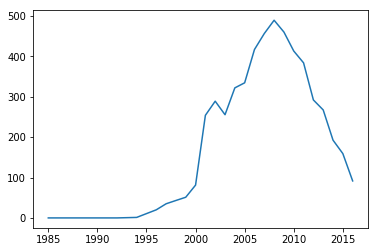

In [14]:
# агрегируем данные за год
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# строим график
plt.plot(gb.index, gb.values);

Вернемся к *Вредным советам*. Чего не хватает на графике?

### Базовый дизайн ``plot``

#### Заголовок

```plt.title("Заголовок")```

``` plt.title("Заголовок", fontsize= Размер заголовка, fontweight='Насыщенность шрифта', family = 'Тип шрифта')```

+ ```fontweight``` - насыщенность шрифта

Варианты fontweight:

```fontweight= {‘ultralight’, ‘light’, ‘normal’, ‘regular’, ‘book’, ‘medium’, ‘roman’, ‘semibold’, ‘demibold’, ‘demi’, ‘bold’, ‘heavy’, ‘extra bold’, ‘black’}``` либо численным значением в диапазоне 0-1000.

+ ```family``` - тип шрифта

Варианты family: 

```family  = {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}```

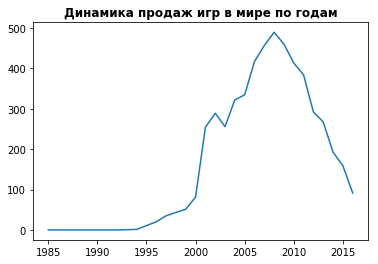

In [36]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()
plt.title("Динамика продаж игр в мире по годам", fontweight='bold') #заголовок
plt.plot(gb.index, gb.values)

#### Подписи осей

```plt.xlabel("Название оси X")```

```plt.ylabel("Название оси Y")```

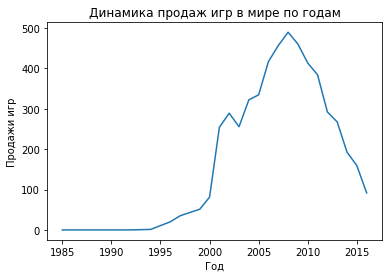

In [41]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values)

#### Размер графика

``` plt.figure(figsize=(Ширина, Высота))```

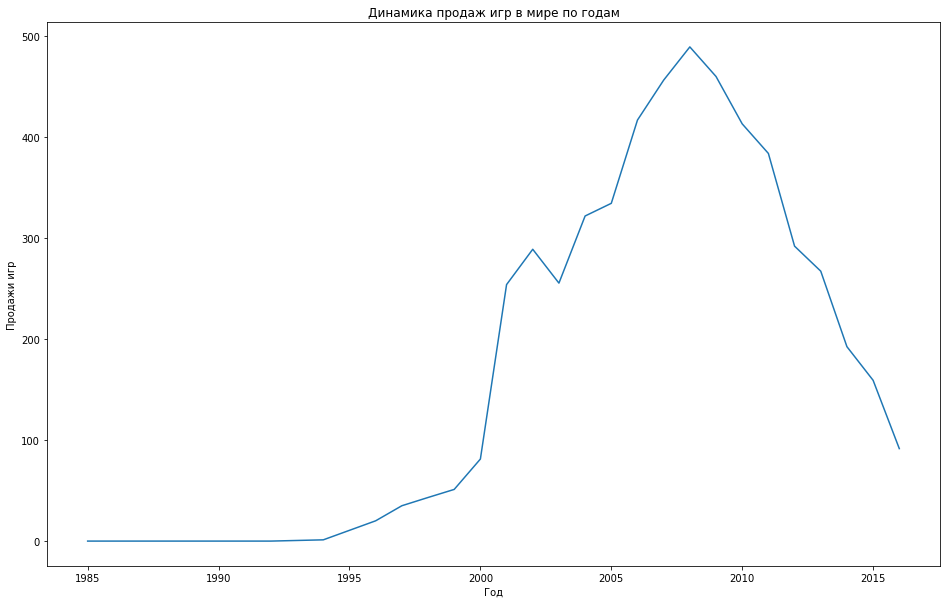

In [17]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10)) #размер

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values)

#### Четкость изображения

```plt.figure(dpi= Количество пикселей на дьюм)```

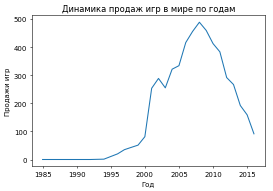

In [18]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

#plt.figure(figsize=(10, 10), dpi=40)

plt.figure(dpi=50)

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values)

#### Линия

##### Толщина линии

```plt.plot(данные для оси X, данные для оси Y, lw = толщина линии)```

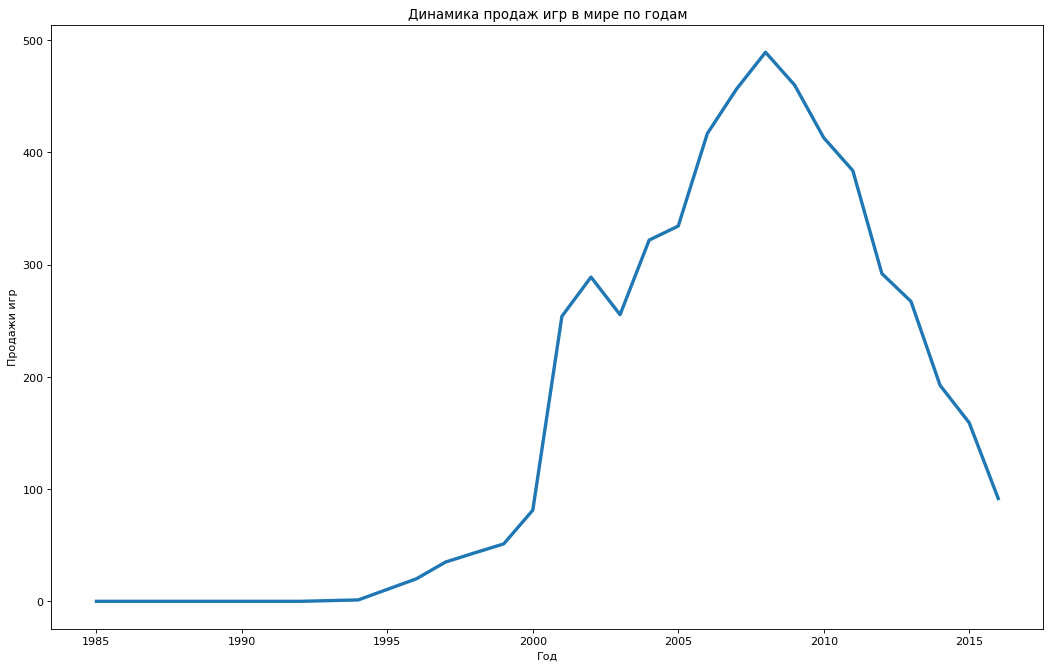

In [19]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi= 80)

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values, lw = 3) #изменили толщину

##### Формат линии

```plt.plot(данные для оси X, данные для оси Y, ls = 'Формат линии')```

Что может быть:
```
'-'

'--' 

'-.'

':'

''

(offset, on-off-seq), ```

и т.д.

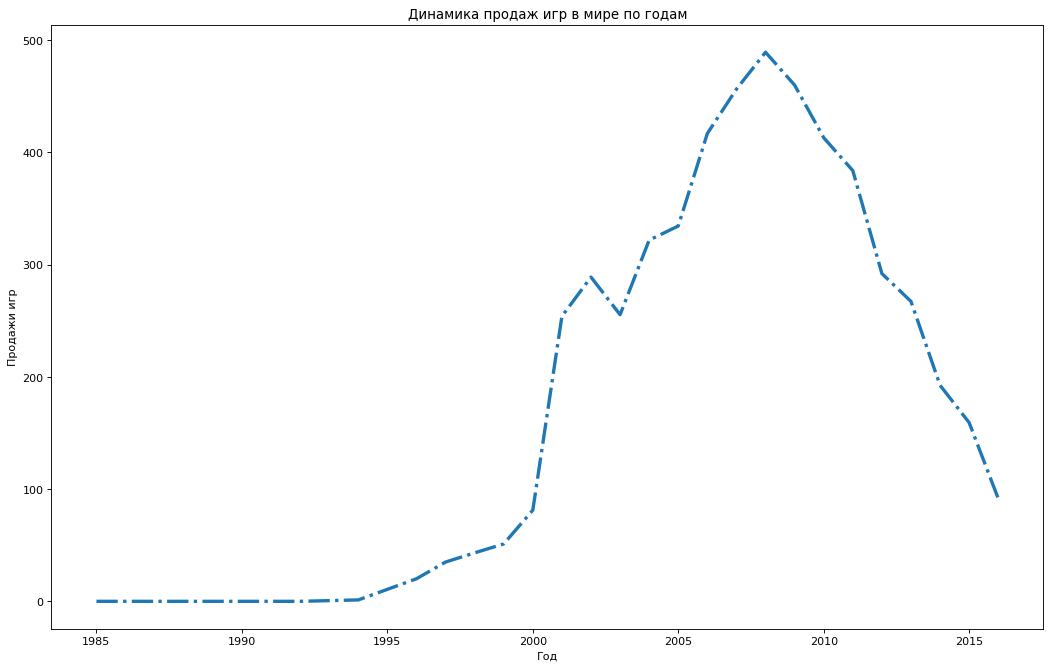

In [20]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi= 80)

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values, ls = '-.', lw = 3) #изменили цвет

##### Цвет

```plt.plot(данные для оси X, данные для оси Y, color = "цвет")```

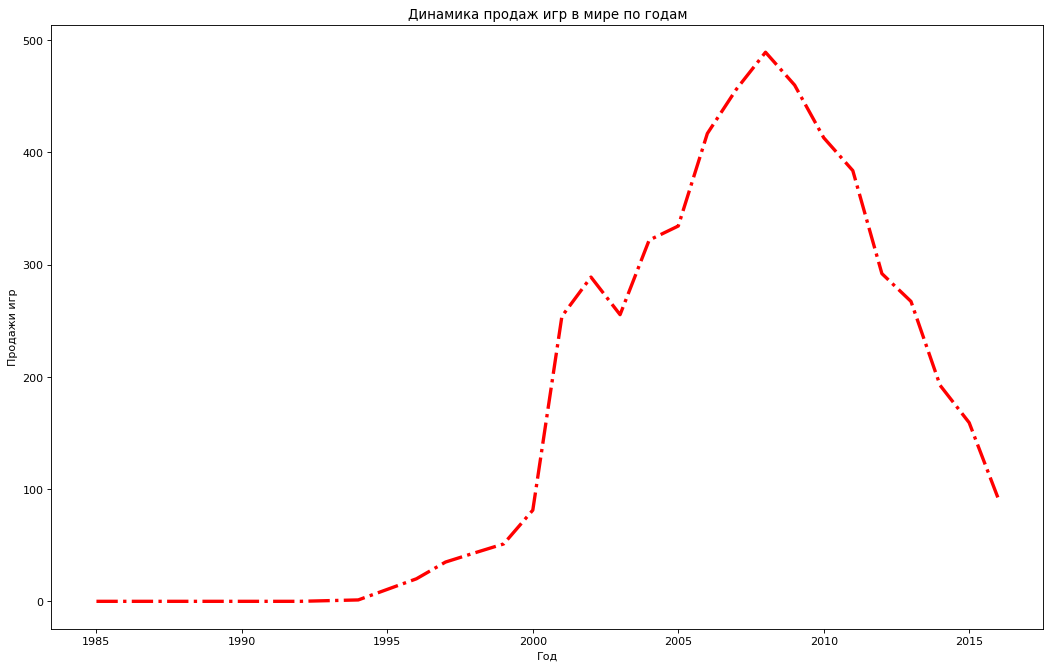

In [21]:
gb = df.groupby('Year_of_Release').Global_Sales.sum()

plt.figure(figsize=(16, 10), dpi= 80)

plt.title("Динамика продаж игр в мире по годам") #заголовок

plt.xlabel("Год") #Название оси X

plt.ylabel("Продажи игр") #Название оси Y

plt.plot(gb.index, gb.values, color = "red", ls = '-.', lw = 3) #изменили цвет

### Один график - несколько линий

Один график, на котором будут отображаться сразу все показатели продаж (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

In [22]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [23]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [24]:
#[1, 2] + [3, 4]

In [25]:
[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Year_of_Release']

In [26]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]

In [27]:
sales_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_of_Release
0,41.36,28.96,3.77,8.45,82.53,2006
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
6,11.28,9.14,6.50,2.88,29.80,2006
7,13.96,9.18,2.93,2.84,28.92,2006


In [28]:
sales_df.groupby('Year_of_Release').sum().head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


Первый вариант нарисовать график:

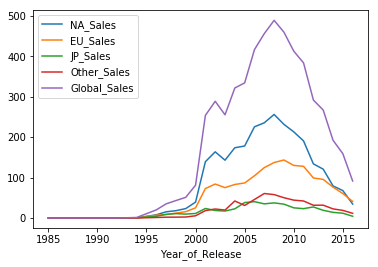

In [60]:
# Заводим датафрейм
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
gb = sales_df.groupby('Year_of_Release').sum()


# Рисуем!
gb.plot();

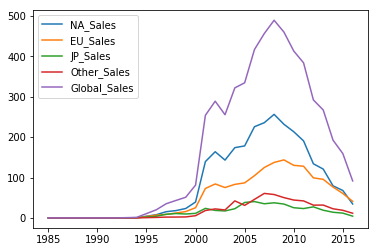

In [30]:
### Через plt.plot():
gb = gb.reset_index()

plt.plot(gb.Year_of_Release, gb.NA_Sales, label = 'NA_Sales')
plt.plot(gb.Year_of_Release, gb.EU_Sales, label = 'EU_Sales')
plt.plot(gb.Year_of_Release, gb.JP_Sales, label = 'JP_Sales')
plt.plot(gb.Year_of_Release, gb.Other_Sales, label = 'Other_Sales')
plt.plot(gb.Year_of_Release, gb.Global_Sales, label = 'Global_Sales')

plt.legend(); #добавляем легенду

## Задание 1 (0,5 бонуса/2 человека)

Добавьте на график выше

+ Заголовок (выбрать насыщенность, размер, шрифт)
+ Подписи осей (выбрать насыщенность, размер, шрифт)
+ Задайте размер 10 на 10
+ Измените дизайн каждой линии (толщина, формат, цвет)

In [31]:
plt.title("Заголовок", fontsize= Размер заголовка, fontweight='Насыщенность шрифта', family = 'Тип шрифта')
plt.xlabel("Название оси X")
plt.ylabel("Название оси Y")
plt.figure(figsize=(16, 10))
ax.plot(данные для оси X, данные для оси Y, color = "цвет", ls = 'Формат линии', lw = Толщина линии)

### Функция ``subplots``

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку.
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней.

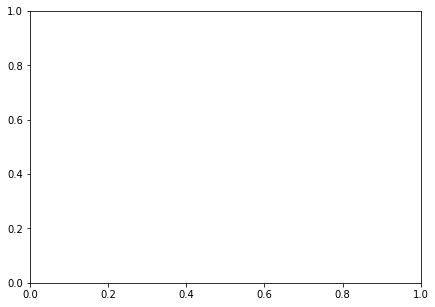

In [32]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали полоино для графика из 1 ряда и 1 колонки (1 график)
                                           # figsize -это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

Посмотрим на динамику продаж игр в мире по годам, но теперь используем `subplots`:

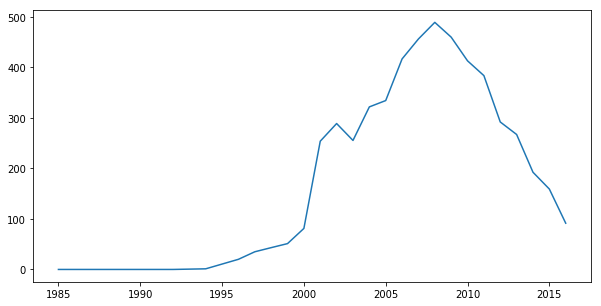

In [64]:
# агрегируем данные за год
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# строим график
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(gb.index, gb.values);

### Базовый дизайн в ``subplots``

В переменной _ax_ на самом деле лежит куча методов, которые позволяют сделать график более приятным. Посмотрим на несколько из них:

#### Размер графика

```fig, ax = plt.subplots(1,1, figsize=(Ширина ,Высота))```

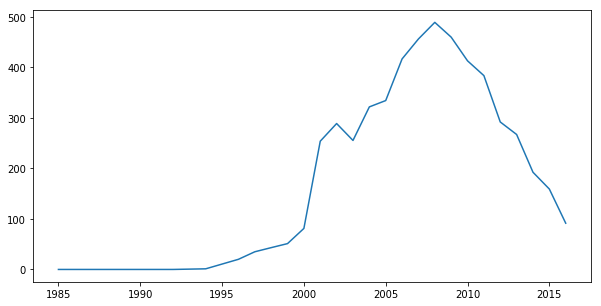

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(gb.index, gb.values)

#### Название осей

```ax.set_xlabel('Подпись оси X', fontsize=Размер шрифта, family='Шрифт')```

```ax.set_ylabel('Подпись оси Y', fontsize=Размер шрифта, family='Шрифт')```


Варианты family: 

```family  = {'cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}```

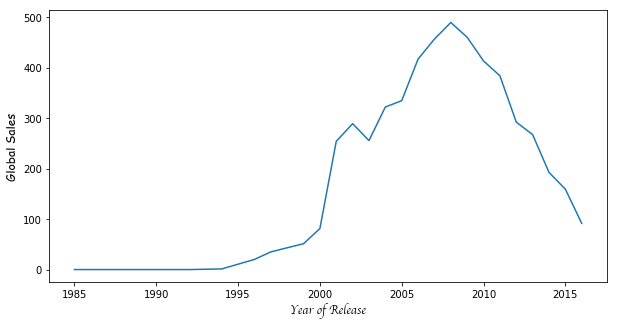

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values)

#### Линия

```ax.plot(данные для оси X, данные для оси Y, color = "цвет", ls = 'Формат линии', lw = Толщина линии)```

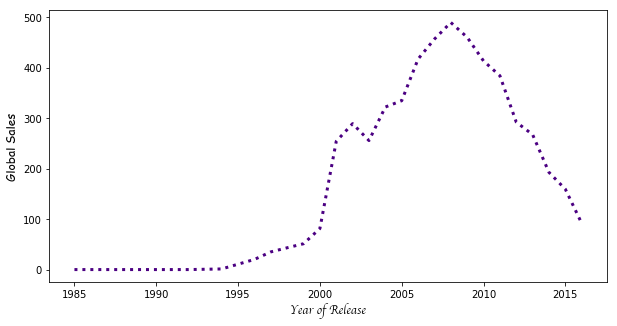

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

#### Границы графика

##### Невидидимые границы

``` ax.spines['Название границы'].set_visible(False)```

Название границ: 
+ "right" - правая граница
+ "left" - левая граница
+ "top" - верхняя граница
+ "bottom" - нижняя граница

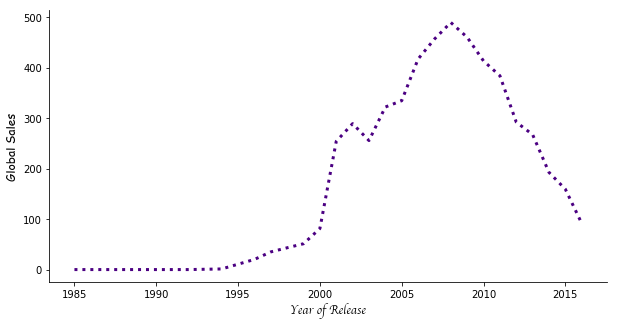

In [57]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

##### Толщина границ

``` ax.spines['Название границы'].set_linewidth(Толщина)```

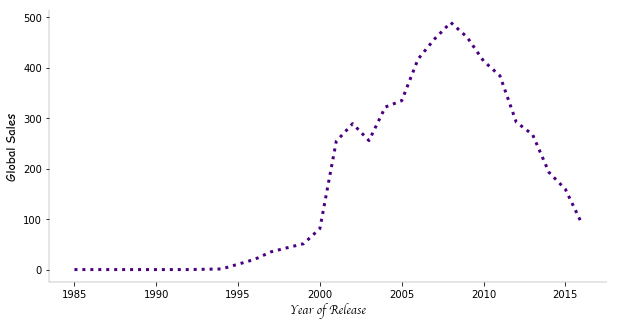

In [58]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# уменьшаем толщину оставших границ графика с помощью цикла 
# (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

##### Толщина засечек на шкалах

``` ax.xaxis.set_tick_params(width=Ширина засечек)```

``` ax.yaxis.set_tick_params(width=Ширина засечек)```

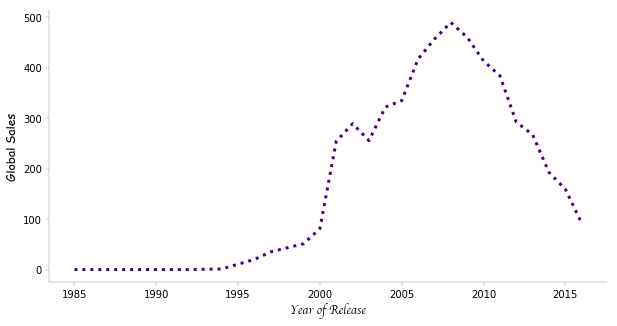

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_xlabel('Year of Release', fontsize=12,family='cursive')
ax.set_ylabel('Global Sales', fontsize=12, family='fantasy')

ax.plot(gb.index, gb.values, color = 'indigo', ls = ':', lw=3)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# уменьшаем толщину оставших границ графика с помощью цикла 
# (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

## Задание 2 (1 бонус/2 человека)

Нарисовать один график, на котором будут отображаться сразу все показатели продаж (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

Добавьте на график

+ Заголовок (выбрать насыщенность, размер, шрифт)
+ Подписи осей (выбрать насыщенность, размер, шрифт)
+ Легенду
+ Задайте размер 10 на 10
+ Измените дизайн каждой линии (толщина, формат, цвет)
+ Задать дизайн границ графика

In [ ]:
# Ваш код



### Создаем систему графиков

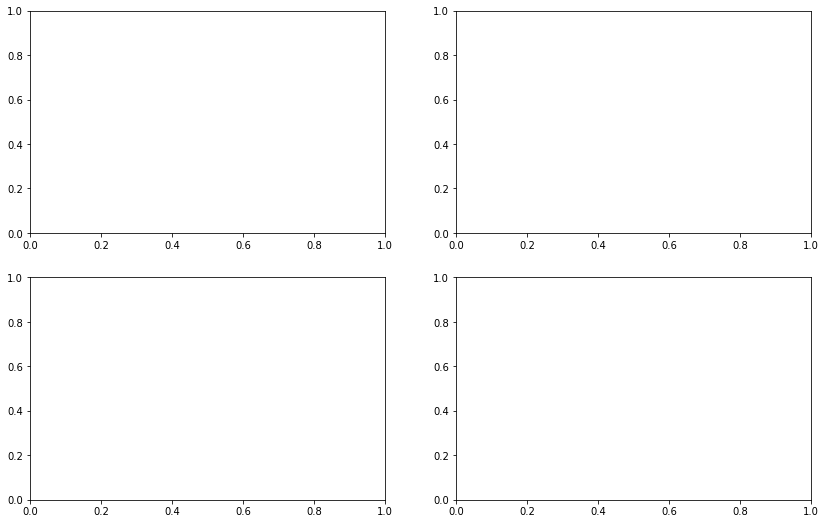

In [62]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок.

Теперь у нас есть четыре графика! 

Объект _ax_ в данном случае **становится матрицой**. И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу из _ax_.

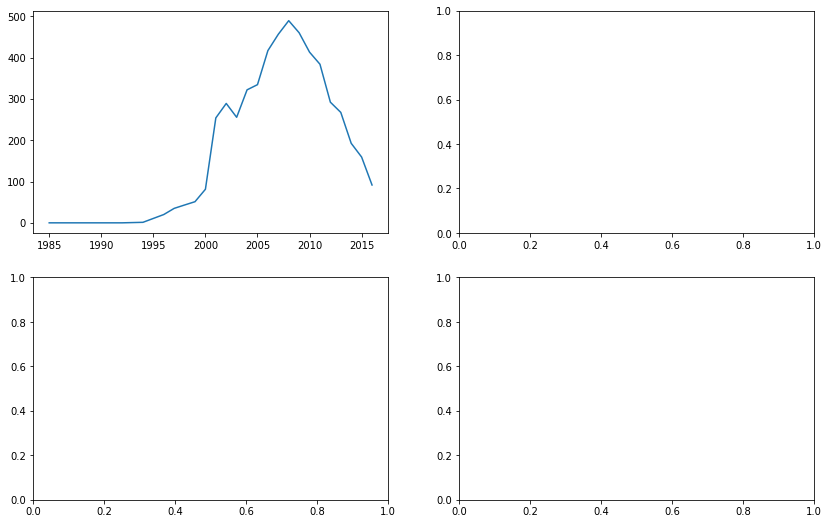

In [65]:
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[0][0].plot(gb.index, gb.values);

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

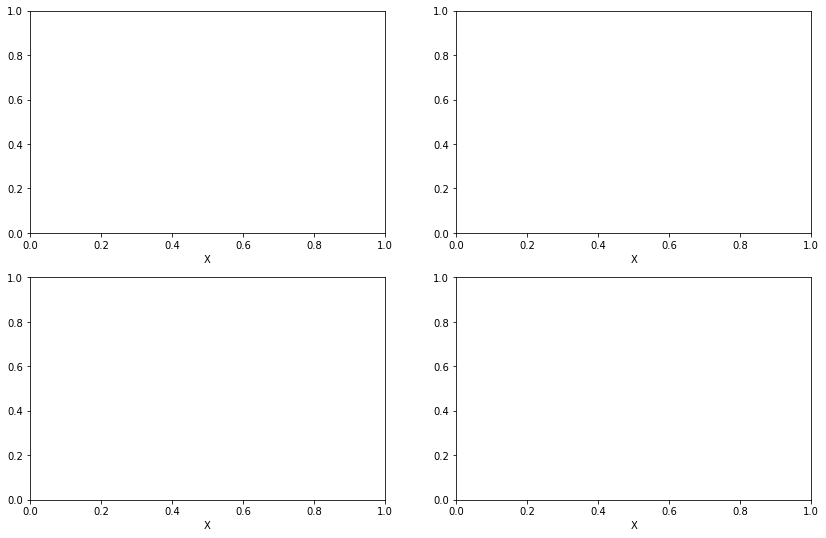

In [66]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('X')

Создайем систему графиков, у которой:
* на 1ом графике изображены продажи в Северной Америке (`NA_Sales`);
* на 2ом продажи в Европейском Союзе (`EU_Sales`);
* на 3ем продажи в Японии (`JP_Sales`)
* на 4ом графике все 3 линии вместе;
* Каждый график должен быть разного цвета. В четвертом графике - каждый график должен быть такого же цвета, как и в своей ячейке + 4ый график должен иметь легенду
* В заголовке к каждому графику напишите то, что стоит у него по оси _y_

In [67]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
gb = sales_df.groupby('Year_of_Release').sum().reset_index()
gb

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1985,0.00,0.03,0.00,0.01,0.03
1,1988,0.00,0.02,0.00,0.01,0.03
2,1992,0.02,0.00,0.00,0.00,0.03
3,1994,0.39,0.26,0.53,0.08,1.27
4,1996,7.91,6.88,4.06,1.24,20.10
5,1997,15.34,8.67,9.01,2.02,35.01
6,1998,18.13,12.13,10.81,2.14,43.18
7,1999,23.32,15.69,9.67,2.45,51.17
8,2000,39.34,25.20,11.27,5.49,81.24
9,2001,139.32,72.85,23.57,18.26,253.88


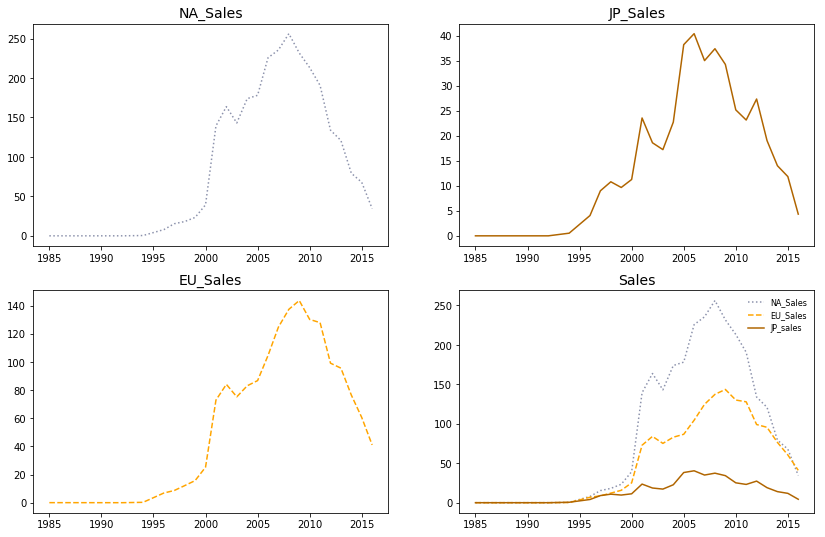

In [68]:
## Ваш код

# Заводим датафрейм
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
gb = sales_df.groupby('Year_of_Release').sum().reset_index()


# Рисуем!
fig, ax= plt.subplots(2, 2, figsize=(14,9))


ax[0][0].plot(gb.Year_of_Release, gb.NA_Sales, color='#8c92ac', ls = ':')
ax[0][0].set_title('NA_Sales', fontsize=14)

ax[1][0].plot(gb.Year_of_Release, gb.EU_Sales, color='#ffa500', ls = '--')
ax[1][0].set_title('EU_Sales', fontsize = 14)

ax[0][1].plot(gb.Year_of_Release, gb.JP_Sales, color='#b06500', ls = '-'); 
ax[0][1].set_title('JP_Sales', fontsize = 14)

ax[1][1].plot(gb.Year_of_Release, gb.NA_Sales, label = 'NA_Sales', color='#8c92ac', ls = ':')
ax[1][1].plot(gb.Year_of_Release, gb.EU_Sales, label = 'EU_Sales', color='#ffa500', ls = '--')
ax[1][1].plot(gb.Year_of_Release, gb.JP_Sales, label = 'JP_sales', color='#b06500', ls = '-')
ax[1][1].set_title('Sales', fontsize = 14)
ax[1][1].legend(loc=1, fontsize=8, frameon=False);

## Графики для категориальных переменных

**Посмотрим на кол-во игр за каждый год с помощью столбчатой диаграммы:**

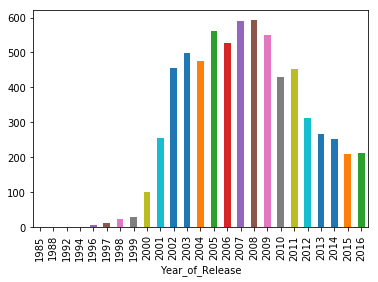

In [69]:
df.groupby('Year_of_Release').Name.count().plot(kind='bar');

**Посмотрим отдельно на кол-во игр жанра Sports и Action за последние 5 лет. Сделаем двойную диаграмму и развернем ее горизонтально**

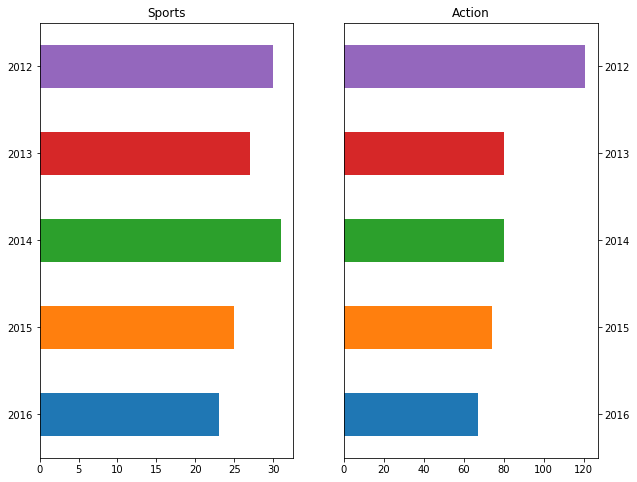

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_sports.plot(kind='barh', ax=ax[0])
ax[0].set_title('Sports')

gb_act = df[df.Genre=='Action'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_act.plot(kind='barh', ax=ax[1])
ax[1].set_title('Action')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически

Подумайте, чем плох такой график?

С помощью двух вертикальных столбчатых диаграмм вывеведем среднюю оценку критиков и пользователей игр различных рейтингов. 

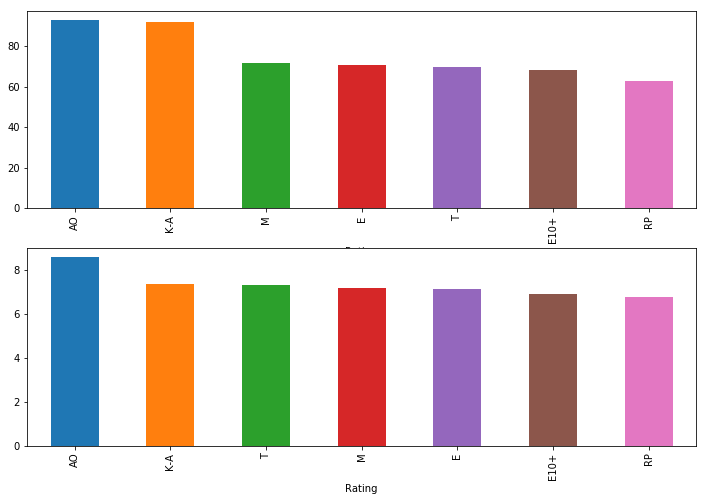

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

gb = df.groupby('Rating')[['Critic_Score', 'User_Score']].mean()

gb['Critic_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[0])
gb['User_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[1]);

В виде горизонтальной столбчатой диаграммы выведите топ-5 девелоперов с наибольшей средней оценкой от критиков. Рядом выведите диаграмму их самой успешной игры по общим продажам. 

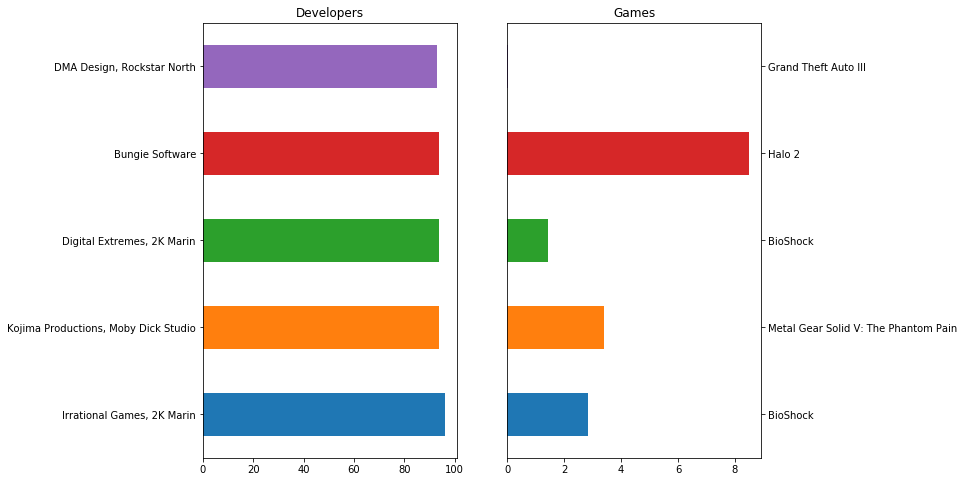

In [72]:
gb = df.groupby('Developer').agg({'Critic_Score' : np.mean, 'Global_Sales': np.max}). \
                                    sort_values(by = 'Critic_Score',ascending=False).head(5).reset_index()
gb = pd.merge(gb, df[['Developer', 'Global_Sales', 'Name']], on=['Developer', 'Global_Sales'])


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb.set_index('Developer').Critic_Score.plot(kind='barh', ax=ax[0])
ax[0].set_title('Developers')

gb.set_index('Name').Global_Sales.plot(kind='barh', ax=ax[1])
ax[1].set_title('Games')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически

### Задача №5:

Сравните оценки игр от критиков для топ-5 крупнейших игровых платформ (по кол-ву игр) с помощью boxplot из пакета seaborn.

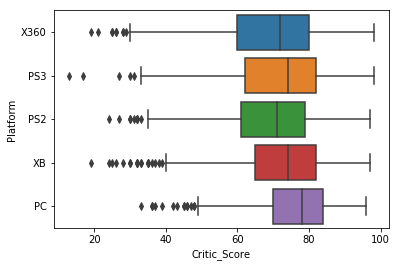

In [76]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h");

## Мультивариативный график рассеяния

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году.

In [78]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


График рассеяния (scatter plot) $-$ это такой график, у которого по оси _x_ и _y_ отложены непрерывные переменные. График состоит из точек, каждая из которых отвечает за свое наблюдение. 

Посмотрим на график зависимостей убийств от краж со взломом (burglary)

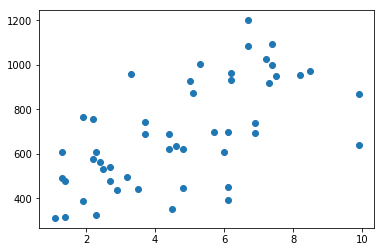

In [79]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['burglary'])
fig.savefig('crimes.png');

Здесь каждая точка отвечает за свой штат. По оси _x_ мы видим сколько в штате было убийств, а по оси _y_ сколько краж со взломом

Попробуем на график добавить дополнительную информацию, например, в качестве размера точки обозначим кол-во населения

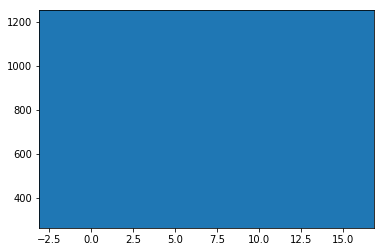

In [80]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

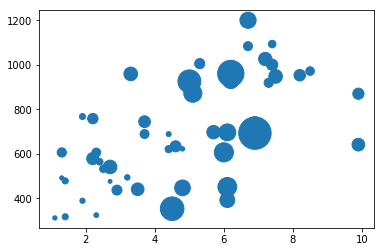

In [81]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Отлично, однако следующая проблема - слияние точек. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

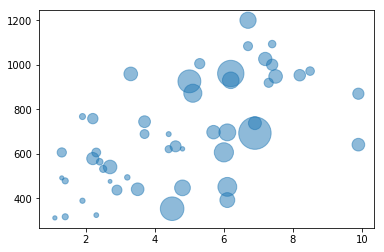

In [82]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000,
           alpha = 0.5);

Добавим теперь еще какую-нибудь переменную (например, robbery) и засунем ее в параметр цвета 

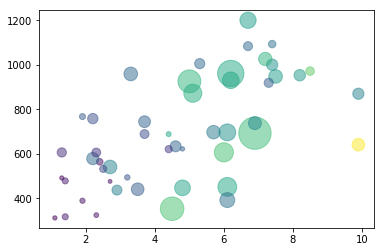

In [83]:
fig, ax = plt.subplots()
ax.scatter(
    crimes['murder'],
    crimes['burglary'],
    s=crimes['population'] / 35000,
    alpha=0.5,
    c=crimes['Robbery']
)  # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции `colorbar()`. Также можем поменять цветовую шкалу с помощью аргумента `cmap`.

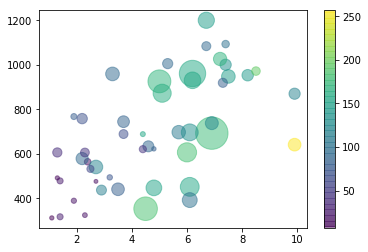

In [84]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
#                          cmap='hot',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

Последнее что тут сделаем - это подпишем штаты

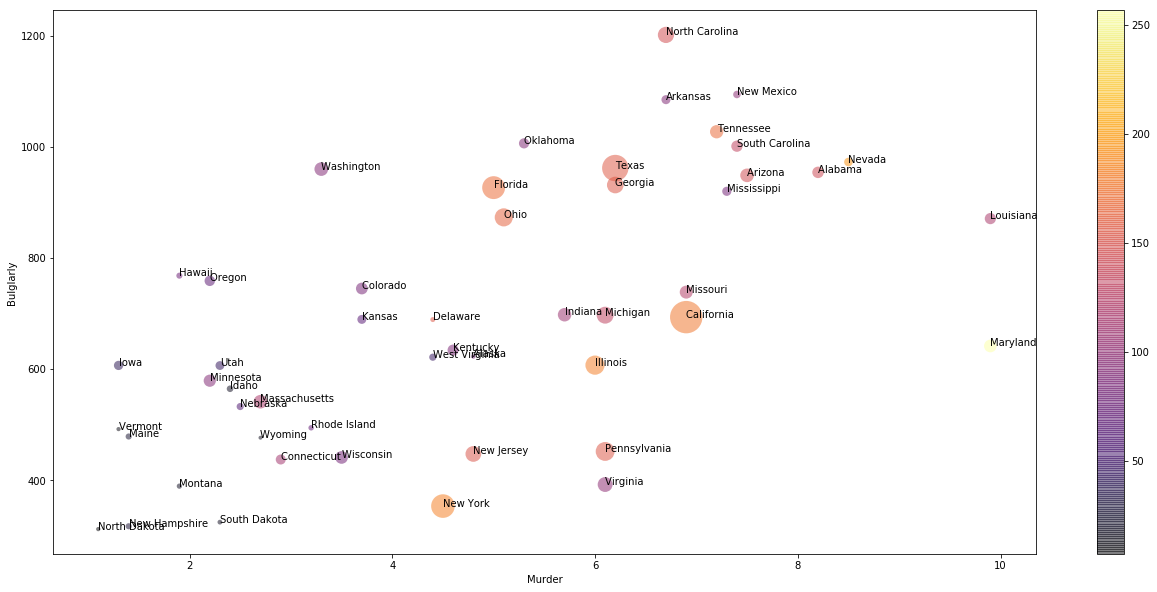

In [85]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         c=crimes['Robbery'],
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(crimes['state']):  
    # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(
        state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10
    )  # используем метод annotate, которому говорим, что нужно брать имя штата
    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
    # ряду в датафрейме)

plt.colorbar(color_graph);

## Практикa (4 бонуса/3 человека)

Используйте встроенный датасэт tips из библиотеки seaborn

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Задание 1

Просуммируйте итоговые суммы заказов по дням недели и постройте линейный график:

Добавьте на график:

 + Заголовок (выбрать насыщенность, размер, шрифт)
 + Подписи осей (выбрать насыщенность, размер, шрифт)
 + Измените дизайн линии (толщина, формат, цвет)

С помощью ``plot``:

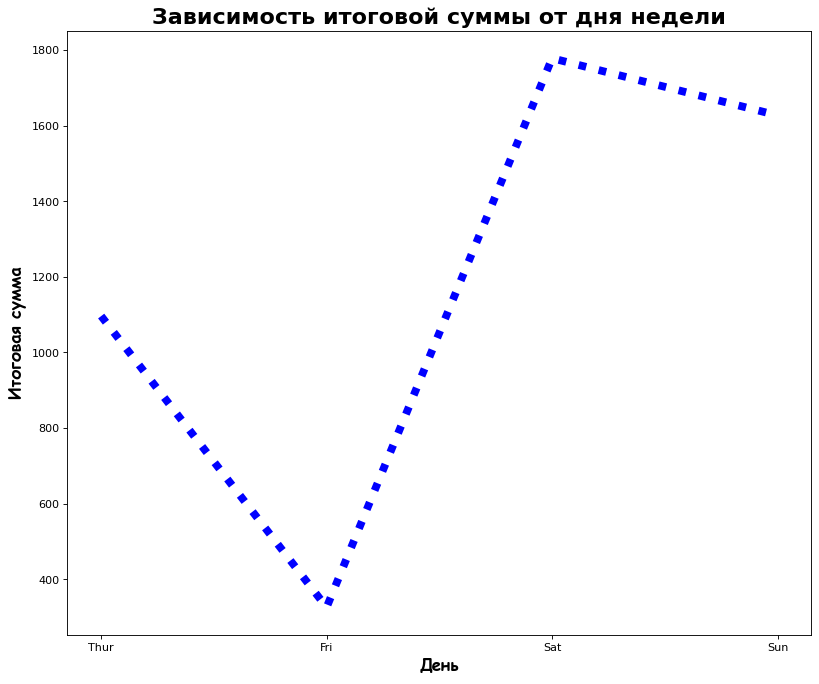

In [40]:
gb = tips.groupby('day').total_bill.sum()
plt.figure(figsize=(12, 10), dpi= 80)
plt.title("Зависимость итоговой суммы от дня недели", fontsize=20, fontweight='extra bold', family='sans serif') 
plt.xlabel("День", fontsize=15, fontweight='demibold', family='cursive') 
plt.ylabel("Итоговая сумма", fontsize=15, fontweight='demibold', family='cursive') 
plt.plot(gb.index, gb.values, color="blue", ls=':', lw=7) 

С помощью ``subplots``:

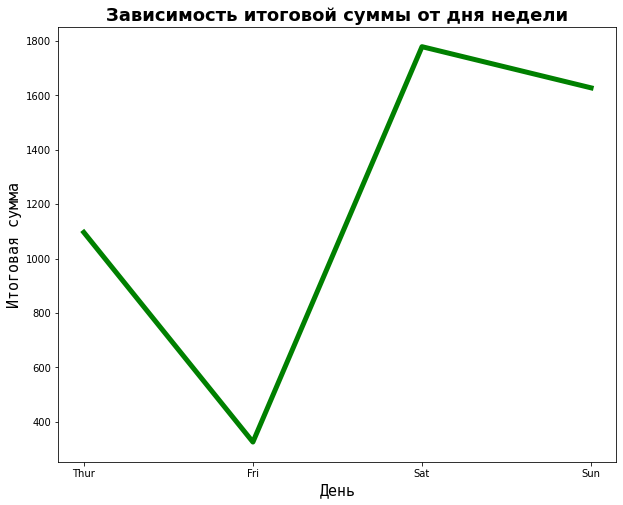

In [51]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.set_title("Зависимость итоговой суммы от дня недели", fontsize=18, fontweight='semibold', family='sans serif')
ax.set_xlabel("День", fontsize=15, family='monospace', fontweight='medium')
ax.set_ylabel("Итоговая сумма", fontsize=15, family='monospace', fontweight='medium')

ax.plot(gb.index, gb.values, color='green', ls='-', lw=5)

### Задание 2

Постройте столбчатую диаграмму распределения, на которой будет видно, кто оставил больше чаевых в целом: женщины или мужчины

Добавьте на график:

 + Заголовок (выбрать насыщенность, размер, шрифт)
 + Подписи осей (выбрать насыщенность, размер, шрифт)
 + Столбец женщины - красный; мужчины - синий

Text(0, 0.5, 'Пол')

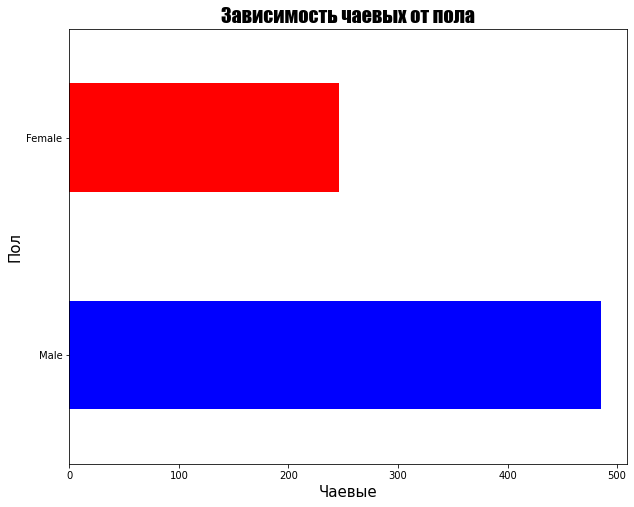

In [85]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 8))
gb_sex = tips.groupby('sex').tip.sum()
gb_sex.plot(kind='barh', color=['blue', 'red'])
ax.set_title('Зависимость чаевых от пола', fontweight='demi', fontsize=20, family='fantasy')
ax.set_xlabel('Чаевые', fontweight='light', fontsize=15, family='sans')
ax.set_ylabel('Пол', fontweight='light', fontsize=15, family='sans')

### Задание 3 

Покажите на графике за какой день недели в **в среднем** оставляют больше чаевых? Используйте barplot

Добавьте на график:

+ Заголовок (выбрать насыщенность, размер, шрифт)
+ Подпись оси (выбрать насыщенность, размер, шрифт)

Text(0, 0.5, 'Количество чаевых')

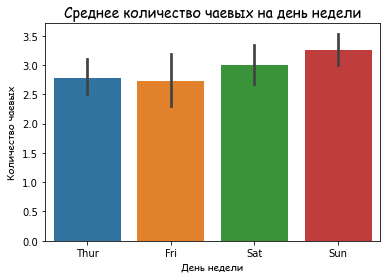

In [108]:
ax = sns.barplot(x="day", y="tip", data=tips)
ax.set_title('Среднее количество чаевых на день недели', fontweight='roman', fontsize=14, family='cursive')
ax.set_xlabel('День недели', fontweight='roman', fontsize=10, family='cursive')
ax.set_ylabel('Количество чаевых', fontweight='roman', fontsize=10, family='cursive')

### Задание 4

Сделайте то же самое, что и в предыдущем пунте, используя boxplot.

Добавьте на график:

+ Заголовок (выбрать насыщенность, размер, шрифт)

Text(0, 0.5, 'Количество чаевых')

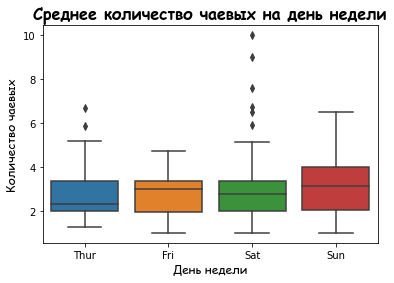

In [110]:
ax = sns.boxplot(x="day", y="tip", data=tips)
ax.set_title('Среднее количество чаевых на день недели', fontweight='heavy', fontsize=16, family='cursive')
ax.set_xlabel('День недели', fontweight='regular', fontsize=12, family='cursive')
ax.set_ylabel('Количество чаевых', fontweight='regular', fontsize=12, family='cursive')

### Задание 5

Нарисуйте точечную диаграмму рассеивания показывающие зависимость размера чаевых (tip) от размера чека (total_bill)

Добавьте на график:

+ Заголовок (выбрать насыщенность, размер, шрифт)
+ Подпись оси (выбрать насыщенность, размер, шрифт)

Text(0, 0.5, 'Общий чек')

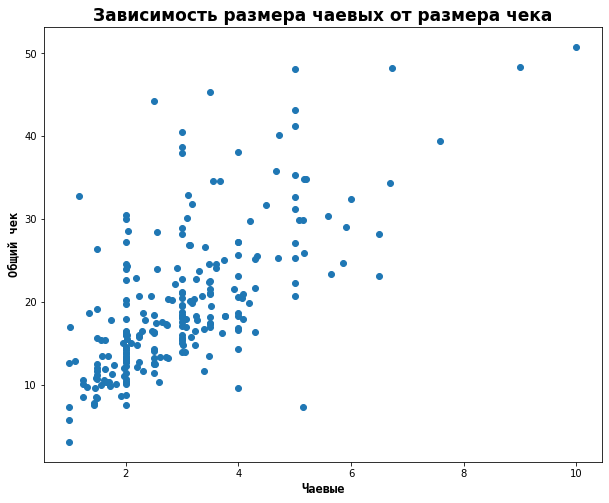

In [121]:
fig, ax = plt.subplots(figsize=(10, 8)) 
ax.scatter(tips['tip'], tips['total_bill'])
ax.set_title('Зависимость размера чаевых от размера чека', fontweight='black', fontsize=17, family='sans')
ax.set_xlabel('Чаевые', fontweight='black', fontsize=12, family='monospace')
ax.set_ylabel('Общий чек', fontweight='black', fontsize=12, family='monospace')

Добавьте, чтобы размер точки отвечал за количество гостей (size)

Text(0, 0.5, 'Общий чек')

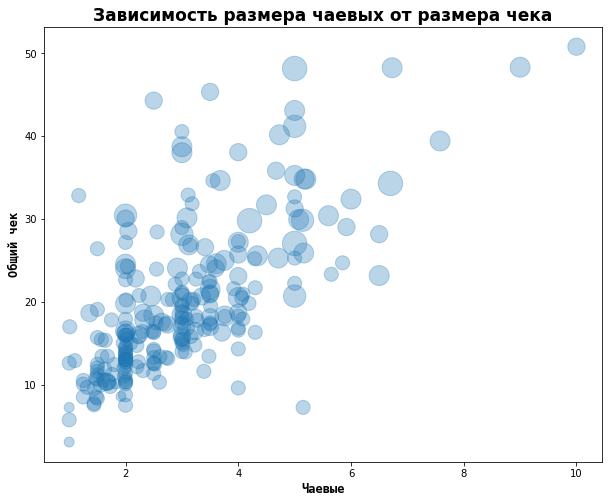

In [127]:
fig, ax = plt.subplots(figsize=(10, 8)) 
ax.scatter(tips['tip'], tips['total_bill'], s = tips['size']*100, alpha=0.3)
ax.set_title('Зависимость размера чаевых от размера чека', fontweight='black', fontsize=17, family='sans')
ax.set_xlabel('Чаевые', fontweight='black', fontsize=12, family='monospace')
ax.set_ylabel('Общий чек', fontweight='black', fontsize=12, family='monospace')

Добавьте если чек оплачивал мужчина кружок был синий, а если женщина, то красный (не забудьте про легенду)

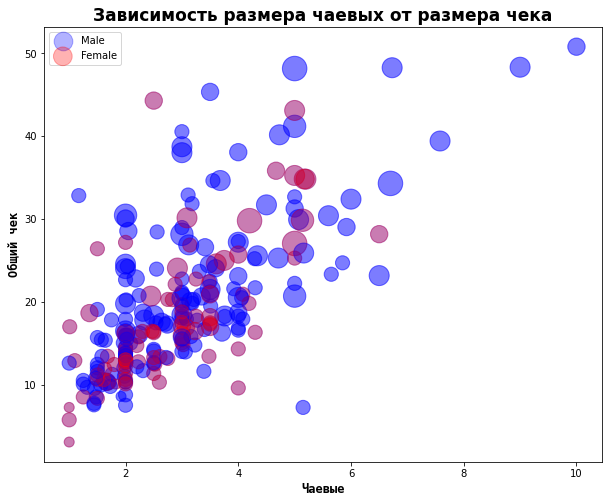

In [243]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 8))
color = ['blue' if i=='Male' else 'red' for i in tips['sex']]
cdict = {
   'Male': 'blue',
   'Female': 'red',
}
ax.scatter(tips['tip'], tips['total_bill'], s=tips['size']*100, alpha=0.3, c=cdict['Male'])
ax.scatter(tips['tip'], tips['total_bill'], s=tips['size']*100, alpha=0.3, c=color)
ax.set_title('Зависимость размера чаевых от размера чека', fontweight='black', fontsize=17, family='sans')
ax.set_xlabel('Чаевые', fontweight='black', fontsize=12, family='monospace')
ax.set_ylabel('Общий чек', fontweight='black', fontsize=12, family='monospace')
ax.legend(cdict)